<a href="https://colab.research.google.com/github/AlbshriAdel/BlockchainPerformanceML/blob/main/BlockchainPerformanceML_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install dependencies and preparing**

In [ ]:
!pip install dfply
!pip install pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#import the numpy and pandas libraries for data manipulation and analysis.
import numpy as np
import pandas as pd
#import the matplotlib library for creating plots and visualizations.
import matplotlib.pyplot as plt

#is to allows the visualizations to be rendered directly in the notebook.
%matplotlib inline

# DataViz
#imports the seaborn library for creating more complex visualizations.
import seaborn as sns


#imports the pingouin and dfply library for statistical analysis and data manipulation.
import pingouin as pg
from dfply import *

# Modeling
#import the necessary modules from the scikit-learn library for machine learning (Knn,SVM).
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR


#imports modules for working with Google sheets(authentication process).
from google.colab import auth
auth.authenticate_user()

# is a step to authorize the connection to the google sheet.
import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)





In [ ]:
##############################################
# This is working with Google sheets by      #
# opening an existing Google sheet called    #
# "ML220930" .Then, it's creating dataframe  # 
# for each worksheet in the google sheet.    #
##############################################

#opens the google sheet with the title "ML220930".
worksheet = gc.open('ML220930')

# to creates a variable for each worksheet in the google sheet, so that the data from each worksheet can be accessed and manipulated.
config = worksheet.worksheet("config")
Results = worksheet.worksheet("Results")
block = worksheet.worksheet("block")
Transactions = worksheet.worksheet("Transactions")
TransactionLatency = worksheet.worksheet("TransactionLatency")
TransactionPool = worksheet.worksheet("TransactionPool")
Test = worksheet.worksheet("Test")
Pred = worksheet.worksheet("Prediction")

# to creates a pandas dataframe for each worksheet, so that the data can be easily manipulated using pandas functions.
cnf = pd.DataFrame(config.get_all_records())
rst = pd.DataFrame(Results.get_all_records())
tst = pd.DataFrame(Test.get_all_records())
prd = pd.DataFrame(Pred.get_all_records())

#is used to drop the 'Simulator No. Run' column from the rst and cnf dataframe.
rst.drop('Simulator No. Run', inplace=True, axis=1)
cnf.drop('Simulator No. Run', inplace=True, axis=1)

# **Preprocessing**

**Configuration parameters**

This section will preprocess the configuration parameters found in the dataset.

In [ ]:
#Creating a new variable named "BC" and assigns the value of the "cnf" variable to it.
BC = cnf


In [ ]:
#To returns the number of rows and columns in the dataframe "BC".
BC.shape

(184, 9)

In [ ]:
#To returns a summary of information about the dataframe "BC".
BC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   No. of Node                       184 non-null    int64  
 1   No. of Miner                      184 non-null    int64  
 2   consensus Algorithm               184 non-null    int64  
 3   Total No of Transactions Per Sec  184 non-null    int64  
 4   Max Block Size                    184 non-null    int64  
 5   Max Tx Size                       184 non-null    float64
 6   Min Tx Size                       184 non-null    float64
 7   Block Interval                    184 non-null    float64
 8   Simulation Time                   184 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 13.1 KB


In [ ]:
#To return the first fifth rows of the dataframe "BC".
BC.head()

,No. of Node,No. of Miner,consensus Algorithm,Total No of Transactions Per Sec,Max Block Size,Max Tx Size,Min Tx Size,Block Interval,Simulation Time
0,4,1,1,1650,1,0.064,0.001,0.050000,1
1,11,1,1,18,1,0.064,0.001,0.064541,1
2,13,1,1,519,1,0.064,0.001,0.083018,1
3,6,1,1,682,1,0.064,0.001,0.069325,1
4,9,1,1,66,1,0.064,0.001,0.070422,1


In [ ]:
#To returns a summary of statistics for each numerical column in the dataframe "BC".
BC.describe()

,No. of Node,No. of Miner,consensus Algorithm,Total No of Transactions Per Sec,Max Block Size,Max Tx Size,Min Tx Size,Block Interval,Simulation Time
count,184.000000,184.0,184.0,184.000000,184.0,1.840000e+02,1.840000e+02,184.000000,184.0
mean,8.326087,1.0,1.0,504.793478,1.0,6.400000e-02,1.000000e-03,0.074581,1.0
std,3.724410,0.0,0.0,292.188503,0.0,1.391565e-17,2.174321e-19,0.014471,0.0
min,3.000000,1.0,1.0,9.000000,1.0,6.400000e-02,1.000000e-03,0.050000,1.0
25%,5.000000,1.0,1.0,264.000000,1.0,6.400000e-02,1.000000e-03,0.063636,1.0
50%,8.000000,1.0,1.0,488.500000,1.0,6.400000e-02,1.000000e-03,0.073109,1.0
75%,11.000000,1.0,1.0,744.500000,1.0,6.400000e-02,1.000000e-03,0.086003,1.0
max,15.000000,1.0,1.0,1650.000000,1.0,6.400000e-02,1.000000e-03,0.099928,1.0


In [ ]:
# to provide a summary of statistics for the first column of the dataframe "BC".
BC.iloc[:,0].describe()

count    184.000000
mean       8.326087
std        3.724410
min        3.000000
25%        5.000000
50%        8.000000
75%       11.000000
max       15.000000
Name: No. of Node, dtype: float64

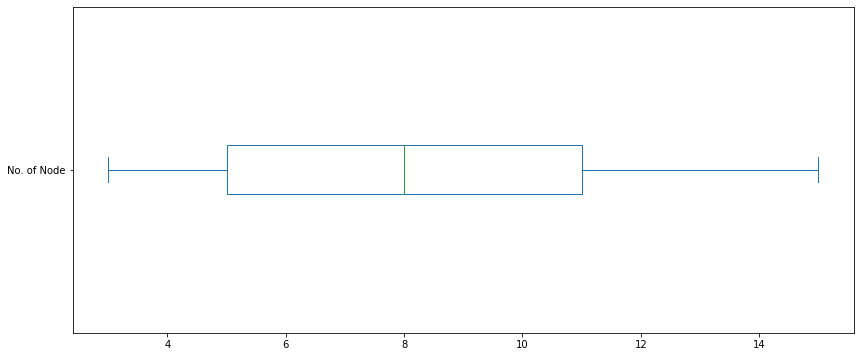

In [ ]:
#To create a box plot for the first column of the dataframe "BC".

#1- "BC.iloc[:,0]" selects the first column of the dataframe "BC" using the iloc property which use to select rows and columns by their integer-based position.

#2-"plot(kind='box', vert=False, figsize=(14,6))" is a method that creates a box plot using the data from the selected column. 
  #"kind" parameter is set to "box" to create a box plot. 
  #"vert" parameter is set to "False" so that the plot is horizontal. 
  #"figsize" parameter is set to (14,6) which sets the size of the plot.
  
BC.iloc[:,0].plot(kind='box', vert=False, figsize=(14,6))

In [ ]:
## to provide a summary of statistics for the fourth column of the dataframe "BC".
BC.iloc[:,3].describe()

count     184.000000
mean      504.793478
std       292.188503
min         9.000000
25%       264.000000
50%       488.500000
75%       744.500000
max      1650.000000
Name: Total No of Transactions Per Sec, dtype: float64

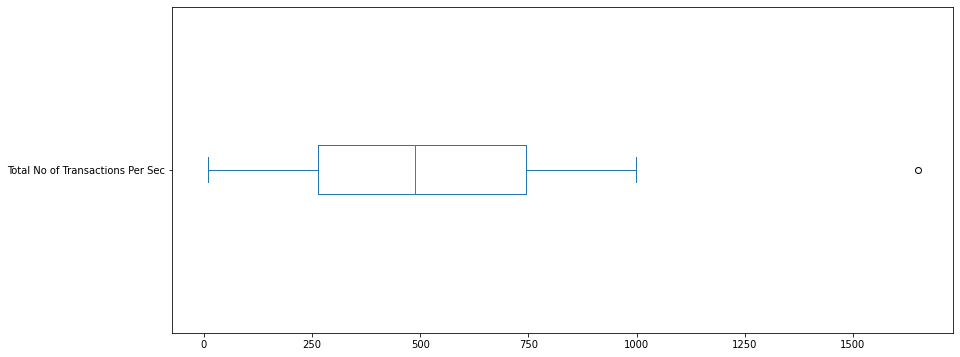

In [ ]:
# to create a box plot for the fourth column of the dataframe "BC"
BC.iloc[:,3].plot(kind='box', vert=False, figsize=(14,6))

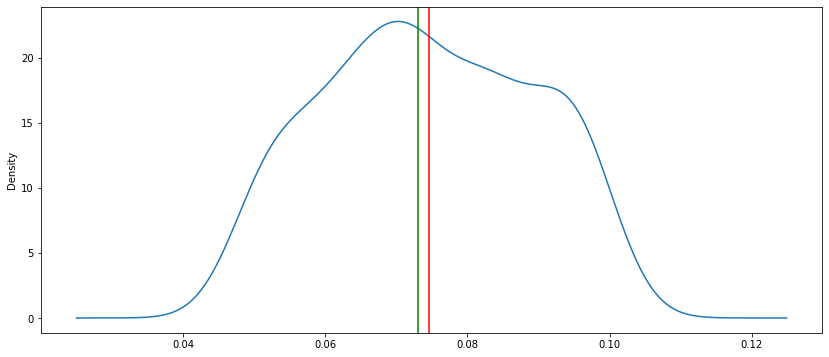

In [ ]:
#to create a density plot for the 8th column of the dataframe "BC", and to also show the mean and median values of the selected column on the same plot.
#to see the distribution of the data and to check for any outliers or skewness in the data. 
ax = BC.iloc[:,7].plot(kind='density', figsize=(14,6)) # kde
ax.axvline(BC.iloc[:,7].mean(), color='red')
ax.axvline(BC.iloc[:,7].median(), color='green')

In [ ]:
#This use to be selecting the first column (index 0) of a dataframe 'BC' and counting the number of occurrences of each unique value in that column. 
BC.iloc[:,0].value_counts()

4     23
9     20
7     19
6     17
3     17
11    16
15    14
12    14
5     12
10    11
13     8
14     7
8      6
Name: No. of Node, dtype: int64

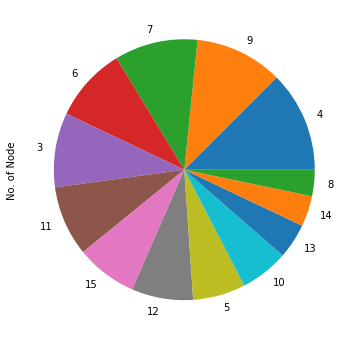

In [ ]:
#This use to be selecting the first column (index 0) of a dataframe 'BC' and counting the number of occurrences of each unique value in that column. 
# The '.plot(kind='pie', figsize=(6,6))' is a function that will plot the data as a pie chart, with a specified width and height of 6 inches.
BC.iloc[:,0].value_counts().plot(kind='pie', figsize=(6,6))

In [ ]:
#to creates a new variable "corr" that contains the correlation matrix of the dataframe 'Bc'. 
corr = cnf.corr()

corr


,No. of Node,No. of Miner,consensus Algorithm,Total No of Transactions Per Sec,Max Block Size,Max Tx Size,Min Tx Size,Block Interval,Simulation Time
No. of Node,1.000000,NaN,NaN,-0.027435,NaN,NaN,NaN,-0.062032,NaN
No. of Miner,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
consensus Algorithm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total No of Transactions Per Sec,-0.027435,NaN,NaN,1.000000,NaN,NaN,NaN,-0.115253,NaN
Max Block Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Max Tx Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min Tx Size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Block Interval,-0.062032,NaN,NaN,-0.115253,NaN,NaN,NaN,1.000000,NaN
Simulation Time,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


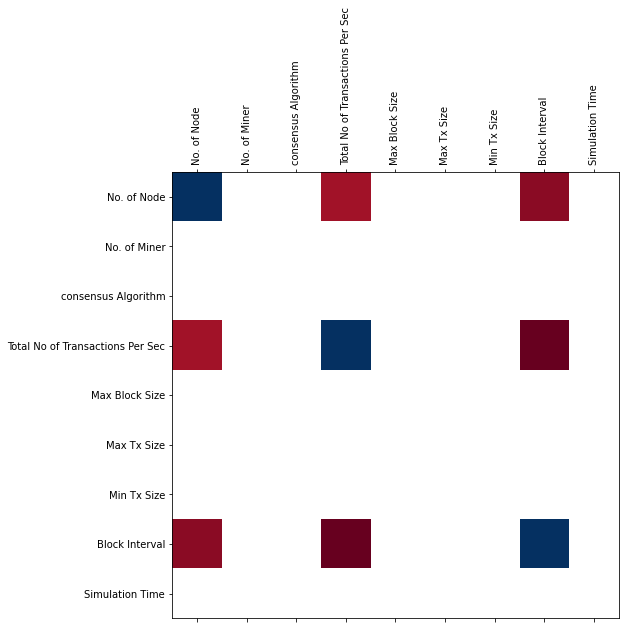

In [ ]:
"""
To visualize the correlations, creating a matrix plot of the correlation matrix corr on the figure fig, using the colormap 'RdBu' (red-blue) 
and then sets the x-axis and y-axis tick labels to the column names of the corr dataframe, x-axis labels are rotated vertically. 
This will show the correlation between different variables of the dataset.

1- fig = plt.figure(figsize=(8,8)) creates a new variable fig that contains a blank figure with a width and height of 8 inches.
2- plt.matshow(corr, cmap='RdBu', fignum=fig.number) creates a matrix plot of the correlation matrix corr on the figure fig, using the colormap 'RdBu' (red-blue) and assigns it to the variable 'fig'.
3- plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical') sets the x-axis tick labels to the column names of the corr dataframe and rotates them vertically to make the labels more readable.
4- plt.yticks(range(len(corr.columns)), corr.columns) sets the y-axis tick labels to the column names of the corr dataframe.
"""

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
#To check the number of missing values in each column of a DataFrame called 'BC'.
BC.isna().sum()

**Results (Metrics)**

This section will preprocess the results based on configuration parameters that found in the dataset.

In [ ]:
#To returns the number of rows and columns in the dataframe "rst".
rst.shape

(184, 13)

In [ ]:
#To returns a summary of information about the dataframe "rst".
rst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Total No. of Blocks               184 non-null    int64  
 1   Total No. of Blocks include Tx    184 non-null    int64  
 2   Total No of Transactions          184 non-null    int64  
 3   Total No. of Pending Tx           184 non-null    int64  
 4   Total No. of Blocks without Tx    184 non-null    int64  
 5   Avg. Block Size (MB)              184 non-null    float64
 6   Avg. No. of Tx per block          184 non-null    float64
 7   Avg. of Tx Inclusion Time (secs)  184 non-null    float64
 8   Avg. Tx Size (MB)                 184 non-null    float64
 9   Avg. Block Propagation (secs)     184 non-null    float64
 10  Avg. Transaction Latency (secs)   184 non-null    float64
 11  Transactions execution (secs)     184 non-null    float64
 12  Transact

In [ ]:
#To return the first fifth rows of the dataframe "rst".
rst.head()

,Total No. of Blocks,Total No. of Blocks include Tx,Total No of Transactions,Total No. of Pending Tx,Total No. of Blocks without Tx,Avg. Block Size (MB),Avg. No. of Tx per block,Avg. of Tx Inclusion Time (secs),Avg. Tx Size (MB),Avg. Block Propagation (secs),Avg. Transaction Latency (secs),Transactions execution (secs),Transaction Throughput (Tx/secs)
0,39,38,1203,447,1,0.971577,30.846150,0.502852,0.031497,0.024703,0.182549,0.963436,1248.655264
1,14,13,18,0,1,0.038419,1.285714,0.515281,0.029882,0.064465,0.020857,0.902509,19.944397
2,25,24,519,0,1,0.677237,20.760000,0.478234,0.032622,0.036483,0.033879,0.912084,569.026617
3,29,28,682,0,1,0.774474,23.517240,0.482088,0.032932,0.031878,0.035139,0.924465,737.723672
4,21,20,66,0,1,0.100100,3.142857,0.427433,0.031850,0.043434,0.022651,0.912115,72.359297


In [ ]:
#To returns a summary of statistics for each numerical column in the dataframe "rst".
rst.describe()

,Total No. of Blocks,Total No. of Blocks include Tx,Total No of Transactions,Total No. of Pending Tx,Total No. of Blocks without Tx,Avg. Block Size (MB),Avg. No. of Tx per block,Avg. of Tx Inclusion Time (secs),Avg. Tx Size (MB),Avg. Block Propagation (secs),Avg. Transaction Latency (secs),Transactions execution (secs),Transaction Throughput (Tx/secs)
count,184.000000,184.000000,184.000000,184.000000,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,25.755435,24.755435,477.673913,27.119565,1.0,0.585740,18.044337,0.484164,0.032538,0.038118,0.052572,0.930338,508.306157
std,5.827200,5.827200,258.657510,78.407558,0.0,0.287120,8.887171,0.027504,0.001269,0.009482,0.052191,0.033231,268.197662
min,9.000000,8.000000,9.000000,0.000000,1.0,0.030274,1.000000,0.421154,0.027944,0.020903,0.016031,0.804714,11.184104
25%,22.000000,21.000000,264.000000,0.000000,1.0,0.376140,11.474768,0.466879,0.031879,0.031405,0.023334,0.904096,291.559383
50%,25.000000,24.000000,488.500000,0.000000,1.0,0.626267,19.178735,0.480865,0.032500,0.036740,0.030497,0.926104,527.806390
75%,29.000000,28.000000,673.750000,0.000000,1.0,0.872095,26.430712,0.496479,0.033016,0.043095,0.054494,0.949921,711.309347
max,43.000000,42.000000,1203.000000,450.000000,1.0,0.971577,30.846150,0.585445,0.037326,0.089413,0.266397,0.999479,1248.655264


In [ ]:
# to provide a summary of statistics for the 13th column of the dataframe "rst".
rst.iloc[:,12].describe()

count     184.000000
mean      508.306157
std       268.197662
min        11.184104
25%       291.559383
50%       527.806390
75%       711.309347
max      1248.655264
Name: Transaction Throughput (Tx/secs), dtype: float64

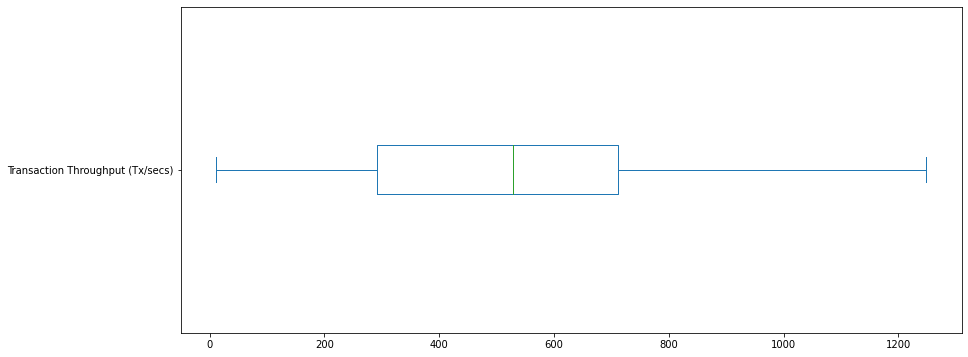

In [ ]:
# to create a box plot for the 13th column of the dataframe "rst"
rst.iloc[:,12].plot(kind='box', vert=False, figsize=(14,6))

In [ ]:
# to creates a new variable "corr" that contains the correlation matrix of the dataframe 'rst'. 
corr = rst.corr()

corr

,Total No. of Blocks,Total No. of Blocks include Tx,Total No of Transactions,Total No. of Pending Tx,Total No. of Blocks without Tx,Avg. Block Size (MB),Avg. No. of Tx per block,Avg. of Tx Inclusion Time (secs),Avg. Tx Size (MB),Avg. Block Propagation (secs),Avg. Transaction Latency (secs),Transactions execution (secs),Transaction Throughput (Tx/secs)
Total No. of Blocks,1.000000,1.000000,0.579641,-0.099168,NaN,0.254474,0.251120,-0.098744,0.074088,-0.935591,-0.166056,0.131929,0.597968
Total No. of Blocks include Tx,1.000000,1.000000,0.579641,-0.099168,NaN,0.254474,0.251120,-0.098744,0.074088,-0.935591,-0.166056,0.131929,0.597968
Total No of Transactions,0.579641,0.579641,1.000000,0.303803,NaN,0.909193,0.909413,0.388261,-0.101261,-0.503474,0.426361,0.586731,0.997791
Total No. of Pending Tx,-0.099168,-0.099168,0.303803,1.000000,NaN,0.428217,0.433277,0.412436,-0.072601,0.128547,0.898288,0.364854,0.285894
Total No. of Blocks without Tx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Avg. Block Size (MB),0.254474,0.254474,0.909193,0.428217,NaN,1.000000,0.998644,0.499528,-0.086209,-0.244289,0.612394,0.660101,0.900109
Avg. No. of Tx per block,0.251120,0.251120,0.909413,0.433277,NaN,0.998644,1.000000,0.501068,-0.123427,-0.240431,0.616110,0.655914,0.900611
Avg. of Tx Inclusion Time (secs),-0.098744,-0.098744,0.388261,0.412436,NaN,0.499528,0.501068,1.000000,-0.012990,0.134979,0.652279,0.573899,0.358401
Avg. Tx Size (MB),0.074088,0.074088,-0.101261,-0.072601,NaN,-0.086209,-0.123427,-0.012990,1.000000,-0.128591,-0.087158,0.031847,-0.104249
Avg. Block Propagation (secs),-0.935591,-0.935591,-0.503474,0.128547,NaN,-0.244289,-0.240431,0.134979,-0.128591,1.000000,0.188488,-0.103320,-0.526404


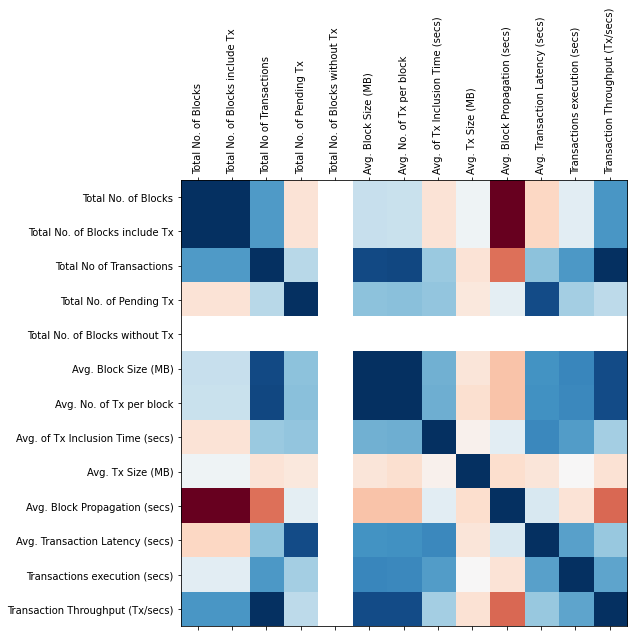

In [ ]:
"""
To visualize the correlations, creating a matrix plot of the correlation matrix corr on the figure fig, using the colormap 'RdBu' (red-blue) 
and then sets the x-axis and y-axis tick labels to the column names of the corr dataframe, x-axis labels are rotated vertically. 
This will show the correlation between different variables of the dataset.

1- fig = plt.figure(figsize=(8,8)) creates a new variable fig that contains a blank figure with a width and height of 8 inches.
2- plt.matshow(corr, cmap='RdBu', fignum=fig.number) creates a matrix plot of the correlation matrix corr on the figure fig, using the colormap 'RdBu' (red-blue) and assigns it to the variable 'fig'.
3- plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical') sets the x-axis tick labels to the column names of the corr dataframe and rotates them vertically to make the labels more readable.
4- plt.yticks(range(len(corr.columns)), corr.columns) sets the y-axis tick labels to the column names of the corr dataframe.
"""

fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
#To check the number of missing values in each column of a DataFrame called 'rst'.
rst.isna().sum()

Total No. of Blocks                 0
Total No. of Blocks include Tx      0
Total No of Transactions            0
Total No. of Pending Tx             0
Total No. of Blocks without Tx      0
Avg. Block Size (MB)                0
Avg. No. of Tx per block            0
Avg. of Tx Inclusion Time (secs)    0
Avg. Tx Size (MB)                   0
Avg. Block Propagation (secs)       0
Avg. Transaction Latency (secs)     0
Transactions execution (secs)       0
Transaction Throughput (Tx/secs)    0
dtype: int64

# **Predication**

**k-nearest neighbors (K*NN*) regression**

This section to build and train KNN regression model.

In [ ]:
#To return the rows of the dataframe "tst" which represent the configuration parameters for prediction its values.
tst.head()

,No. of Node,No. of Miner,consensus Algorithm,Total No of Transactions Per Sec,Max Block Size,Max Tx Size,Min Tx Size,Block Interval,Simulation Time
0,8,1,1,840,1,0.518,0.45,0.0567,1


In [ ]:
"""
 k-nearest neighbors (KNN) regression to predict the value of each column in the DataFrame 'test' 
 using the data from the DataFrame 'cnf' and splitting the dataset into a training and testing set. 
 It is then printing the column number and the predictions, then it is storing the predictions to 
 the first row and current column of the dataframe 'prd'.
"""
for i in range(rst.shape[1]):
  X = cnf #X is assigned a dataframe cnf, which is the independent variable that is used to predict the target variable y.
  y = rst.iloc[:,i] # y is assigned the current column of the dataframe 'rst' that is being iterated through by the for loop.

  #This is splitting the dataset into a training and testing set, where 80% of the data is used for training and 20% of the data is used for testing.
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12) 

  #This is creating an instance of the KNeighborsRegressor object with n_neighbors=5 and fitting the model on the training data.
  knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

  #This line is using the knn_model to predict the target variable y of the test data.
  preds = knn_model.predict(tst)
  if i<5:
    # This will print the column number and rounded predictions and assigns the rounded predictions to the first row and current column of the dataframe 'prd'.
    print(str(i) + " : " + str(np.round(preds)))
    prd.iloc[0,i] = np.round(preds)
  else:
    #This will print the column number and predictions and assigns the predictions to the first row and current column of the dataframe 'prd'.
    print(str(i) + " : " + str(preds))
    prd.iloc[0,i] = preds

0 : [29.]
1 : [28.]
2 : [780.]
3 : [57.]
4 : [1.]
5 : [0.8812843]
6 : [27.433168]
7 : [0.51752388]
8 : [0.03212864]
9 : [0.034409]
10 : [0.10194981]
11 : [0.964333]
12 : [810.36972442]


In [ ]:
#To return the rows of the dataframe "prd" which represent the output after prediction.
prd.head()

,Total No. of Blocks,Total No. of Blocks include Tx,Total No of Transactions,Total No. of Pending Tx,Total No. of Blocks without Tx,Avg. Block Size (MB),Avg. No. of Tx per block,Avg. of Tx Inclusion Time (secs),Avg. Tx Size (MB),Avg. Block Propagation (secs),Avg. Transaction Latency (secs),Transactions execution (secs),Transaction Throughput (Tx/secs)
0,29,28,780,57,1,0.881284,27.433168,0.517524,0.032129,0.034409,0.10195,0.964333,810.369724


In [ ]:
"""
This is calculating the R^2 score of the knn_model on the test set and assigns it to the variable 'score_knn' and then prints the R^2 score. 
This score measures the goodness of the model.
"""
score_knn = knn_model.score(X_test, y_test)
score_knn

**Support Vector Machines (SVM)**

This section to build and train SVM model.

In [ ]:
#To return the rows of the dataframe "tst" which represent the configuration parameters for prediction its values.
tst.head()

,No. of Node,No. of Miner,consensus Algorithm,Total No of Transactions Per Sec,Max Block Size,Max Tx Size,Min Tx Size,Block Interval,Simulation Time
0,8,1,1,840,1,0.518,0.45,0.0567,1


In [ ]:
"""
 SVM to predict the value of each column in the DataFrame 'test' 
 using the data from the DataFrame 'cnf' and splitting the dataset into a training and testing set. 
 It is then printing the column number and the predictions, then it is storing the predictions to 
 the first row and current column of the dataframe 'prd'.
"""

for i in range(rst.shape[1]):
  X = cnf #X is assigned a dataframe cnf, which is the independent variable that is used to predict the target variable y.
  y = rst.iloc[:,i] #y is assigned the current column of the dataframe 'rst' that is being iterated through by the for loop.

  #This is splitting the dataset into a training and testing set, where 80% of the data is used for training and 20% of the data is used for testing
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=12)
  #This is creating an instance of the SVR object with kernel 'linear', gamma='scale', C=1.0, epsilon=0.1 
  svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
  #This is fitting the model on the training data.
  svr_linear.fit(X_train, y_train) 

  #this line is using the svr_linear to predict the target variable y of the test data.
  preds = svr_linear.predict(tst)
  if i<5:
    #this will print the column number and rounded predictions and assigns the rounded predictions to the first row and current column of the dataframe 'prd'.
    print(str(i) + " : " + str(np.round(preds)))
    prd.iloc[0,i] = np.round(preds)
  else:
    #this will print the column number and predictions and assigns the predictions to the first row and current column of the dataframe 'prd'.
    print(str(i) + " : " + str(preds))
    prd.iloc[0,i] = preds

0 : [28.]
1 : [27.]
2 : [840.]
3 : [0.]
4 : [1.]
5 : [1.06116631]
6 : [27.80139831]
7 : [0.50329946]
8 : [0.03263505]
9 : [0.055158]
10 : [0.12233854]
11 : [0.9020962]
12 : [882.67094629]


In [ ]:
#To return the rows of the dataframe "prd" which represent the output after prediction.
prd.head()

,Total No. of Blocks,Total No. of Blocks include Tx,Total No of Transactions,Total No. of Pending Tx,Total No. of Blocks without Tx,Avg. Block Size (MB),Avg. No. of Tx per block,Avg. of Tx Inclusion Time (secs),Avg. Tx Size (MB),Avg. Block Propagation (secs),Avg. Transaction Latency (secs),Transactions execution (secs),Transaction Throughput (Tx/secs)
0,28,27,840,0,1,1.061166,27.801398,0.503299,0.032635,0.055158,0.122339,0.902096,882.670946


In [ ]:
"""
This is calculating the R^2 score of the svr_linear model on the test set and then prints the R^2 score. 
This score measures the goodness of the model.
"""
svr_linear.score(X_test,y_test)

0.9048558440850298

**Statistical Analysis**

In [ ]:
df= pd.read_csv('/content/Freid.csv')

In [ ]:
df.head()

,plant_var,L1,L2,L3,L4
0,P1,0.2,0.3,0.6,0.4
1,P2,0.3,0.4,0.7,0.6


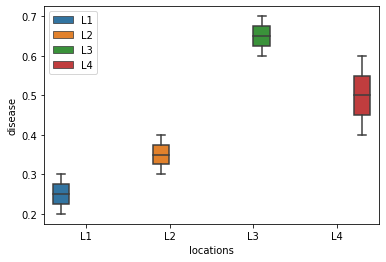

,Source,W,ddof1,Q,p-unc
Friedman,locations,1.0,3,6.0,0.11161


In [ ]:
df_long = pd.melt(df.reset_index(), id_vars=['plant_var'], value_vars=['L1', 'L2', 'L3', 'L4'])
df_long.columns = ['plant_var', 'locations', 'disease']
df_long >> group_by(X.locations) >> summarize(n=X['disease'].count(), mean=X['disease'].mean(), 
                                              median=X['disease'].median(), std=X['disease'].std())
sns.boxplot(data=df_long, x="locations", y="disease", hue=df_long.locations.tolist())
plt.show()
pg.friedman(data=df_long, dv="disease", within="locations", subject="plant_var")

# **Optimization algorithms to find the best configuration parameters**

Exploration and exploitation are two fundamental concepts in many optimization algorithms.

Exploration refers to the process of searching a wide range of the solution space to identify new, potentially better solutions. 

Exploitation, on the other hand, refers to the process of focusing on a specific region of the solution space that is known to contain good solutions. 


**Salp Swarm Optimization Algorithm (SSO)**

The Salp Swarm Algorithm (SSA) is a metaheuristic optimization algorithm that is inspired by the behavior of a group of salps (a type of marine organism) moving in a swarm. The basic steps of the SSA algorithm are as follows:


1.   Initialization: The algorithm starts by randomly generating a group of individuals (or particles) in the search space. Each particle represents a potential solution to the optimization problem.
2.   Movement: The particles move in the search space according to a velocity update equation. The velocity of each particle is influenced by its own previous position, the best position it has encountered so far (personal best), and the best position encountered by any particle in the swarm (global best).
3. Selection: After each movement, the algorithm selects a subset of the particles based on their fitness (i.e., how well they solve the optimization problem). The selected particles are called elite particles.
4. Replication: The elite particles are then replicated to form a new group of particles. The new particles are slightly modified versions of their parent particles, with the addition of small random perturbations.
5. Iteration: The above steps are repeated for a fixed number of iterations or until a stopping criterion is met (e.g., reaching a satisfactory solution or exceeding a maximum number of iterations).
6. Output: The algorithm returns the best solution found by any particle in the final swarm as the output.



In [ ]:
"""
Salp Swarm Optimization Algorithm (SSO). 
The algorithm takes in training data, xtrain and ytrain, and a value, val, that the salps need to reach 
and also has several parameters such as the number of salps (N), the number of iterations (max_iter), 
the lower and upper bounds (lb and ub), and a threshold value (thres). 
Algorithm includes several functions: 
1- init_position, which is used to randomly generate the vector of each salp (a particle in SSA), 
2- boundaryx, which is used to bound the feature values after each update, 
3- Fun, which represents the fitness function, in this case it uses K-Nearest Neighbors (KNN) regression, 
4- SSA, which is the main function of the algorithm. 

"""

import numpy as np
from numpy.random import rand
#init_position function is used to randomly generate the vector of each salp
def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')#2D array containing the values of each salp (vector)
    for i in range(N):#N represents the number of salps; i.e. matrix rows
        for d in range(dim):#dim represents the number of problem dimensions; i.e. matrix columns
            #The following conditions generate the value with respect to the features specifications
            if d == 0:
              X[i,d] = round(3 + (10 - 3) * rand())
            elif d == 1:
              X[i,d] = 1
            elif d == 2:
              X[i,d] = 1
            elif d == 3:
              X[i,d] = 9 + (1600 - 9) * rand()
            elif d == 4:
              X[i,d] = 1
            elif d == 5:
              X[i,d] = 0.064 + (0.5 - 0.064) * rand()
            elif d == 6:
              X[i,d] = 0.003 + (0.5 - 0.003) * rand()
            elif d == 7:
              X[i,d] = 0.05 + (0.09 - 0.05) * rand()
            elif d == 8:
              X[i,d] = 1
    
    return X

#boundary function is used to bound the feature values after each update
def boundaryx(x, lb, ub,i):
  if i == 0:
    if x < 3:
        x = 3
    elif x > 10:
        x = 10
    else:
      x = round(x)
  elif i == 1:
    x = 1
  elif i == 2:
    if x < 1 or x>1:
        x = 1
  elif i == 3:
    if x < 9:
        x = 9
    elif x > 1500:
        x = 1500
  elif i == 4:
    if x < 1:
        x = 1
    elif x > 5:
        x = 5
  elif i == 5:
    if x < 0.064:
        x = 0.064
    elif x > 1:
        x = 0.5
  elif i == 6:
    if x < 0.003:
        x = 0.003
    elif x > 1:
        x = 0.5
  elif i == 7:
    if x < 0.05:
        x = 0.05
    elif x > 0.09:
        x = 0.09
  elif i == 8:
    if x < 1 or x>1:
        x = 1
    
  return x

#Fun function represents the fitness function which KNN regression in our case
def Fun(xtrain, ytrain, Xbin):
  
  knn_model = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)
  preds = knn_model.predict(Xbin)
  return preds

#SSA function is the main function of salp optimization algorithm. It takes train data and the value (val) that need to be reached by the salps
def SSA(xtrain, ytrain,val):
    #Exploration setp of SSA
    # Parameters
    ub    = 10
    lb    = 0
    thres = 0.5
    
    N        = 10
    max_iter = 100
    
    # Dimension
    dim = 9
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xf    = np.zeros([1, dim], dtype='float')
    fitF  = float('inf')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    #Exploitation step of SSA
    while t < max_iter:
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, X[i,:].reshape(1, -1))
            for k in range(N):
              tmp = abs(fit[0,0] - val)
              if abs(fit[i,0] - val)<tmp:
                Xf[0,:] = X[i,:]
                fitF    = fit[i,0]
        
        # Store result
        
        t += 1
        
 	    # Compute coefficient, c1 (3.2)
        c1 = 2 * np.exp(-(4 * t / max_iter) ** 2)
        
        for i in range(N):          
            # First leader update
            if i == 0:  
                for d in range(dim):
                    # Coefficient c2 & c3 [0 ~ 1]
                    c2 = rand() 
                    c3 = rand()
              	    # Leader update (3.1)
                    if c3 >= 0.5: 
                        #X[i,d] = Xf[0,d] + c1 * ((ub[0,d] - lb[0,d]) * c2 + lb[0,d])
                        if d == 0:
                          X[i,d] = Xf[0,d] + c1 * ((10 - 3) * c2 + 3)
                        elif d == 1:
                          X[i,d] = Xf[0,d] + c1 * ((5 - 1) * c2 + 1)
                        elif d == 3:
                          X[i,d] = Xf[0,d] + c1 * ((1600 - 9) * c2 + 9)
                        elif d == 5:
                          X[i,d] = Xf[0,d] + c1 * ((0.5 - 0.064) * c2 + 0.064)
                        elif d == 6:
                          X[i,d] = Xf[0,d] + c1 * ((0.5 - 0.003) * c2 + 0.003)
                        elif d == 7:
                          X[i,d] = Xf[0,d] + c1 * ((0.09 - 0.05) * c2 + 0.05)
            
                    else:
                        #X[i,d] = Xf[0,d] - c1 * ((ub[0,d] - lb[0,d]) * c2 + lb[0,d])
                        if d == 0:
                          X[i,d] = Xf[0,d] - c1 * ((10 - 3) * c2 + 3)
                        elif d == 1:
                          X[i,d] = Xf[0,d] - c1 * ((5 - 1) * c2 + 1)
                        elif d == 3:
                          X[i,d] = Xf[0,d] - c1 * ((1600 - 9) * c2 + 9)
                        elif d == 5:
                          X[i,d] = Xf[0,d] - c1 * ((0.5 - 0.064) * c2 + 0.064)
                        elif d == 6:
                          X[i,d] = Xf[0,d] - c1 * ((0.5 - 0.003) * c2 + 0.003)
                        elif d == 7:
                          X[i,d] = Xf[0,d] - c1 * ((0.09 - 0.05) * c2 + 0.05)
                    # Boundary
                    X[i,d] = boundaryx(X[i,d], lb[0,d], ub[0,d],d) 
                
            # Salp update
            elif i >= 1:
                for d in range(dim):
                    # Salp update by following front salp (3.4)
                    X[i,d] = (X[i,d] + X[i-1, d]) / 2
                    # Boundary
                    X[i,d] = boundaryx(X[i,d], lb[0,d], ub[0,d],d) 
        
    print(fitF)
    return Xf[0,:]  

In [ ]:
X = cnf.values
y = rst.iloc[:,12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)
SSA(X_train, y_train,15)

806.1434710199999


array([4.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.02770596e+03,
       1.00000000e+00, 4.11045992e-01, 1.97543350e-01, 6.04187432e-02,
       1.00000000e+00])

# **SSO Comparison among the different of swarm intelligence algorithms**

**Particle Swarm Optimization (PSO)**

Particle Swarm Optimization (PSO) is a metaheuristic optimization algorithm that is inspired by the behavior of a swarm of birds or fish. Like the Salp Swarm Algorithm (SSA), PSO is a population-based algorithm that uses a group of individuals (or particles) to explore the solution space. The basic steps of the PSO algorithm are as follows:

1. Initialization: The algorithm starts by randomly generating a group of particles in the search space. Each particle represents a potential solution to the optimization problem.

2. Movement: The particles move in the search space according to a velocity update equation. The velocity of each particle is influenced by its own previous position, the best position it has encountered so far (personal best), and the best position encountered by any particle in the swarm (global best).

3. Iteration: The above steps are repeated for a fixed number of iterations or until a stopping criterion is met (e.g., reaching a satisfactory solution or exceeding a maximum number of iterations).

4. Output: The algorithm returns the global best position encountered by any particle in the final swarm as the output.

In [ ]:
import numpy as np
from numpy.random import rand


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def init_velocity(lb, ub, N, dim):
    V    = np.zeros([N, dim], dtype='float')
    Vmax = np.zeros([1, dim], dtype='float')
    Vmin = np.zeros([1, dim], dtype='float')
    # Maximum & minimum velocity
    for d in range(dim):
        Vmax[0,d] = (ub[0,d] - lb[0,d]) / 2
        Vmin[0,d] = -Vmax[0,d]
        
    for i in range(N):
        for d in range(dim):
            V[i,d] = Vmin[0,d] + (Vmax[0,d] - Vmin[0,d]) * rand()
        
    return V, Vmax, Vmin


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def pso(xtrain, ytrain, val):
    # Parameters
    ub    = 10
    lb    = 0
    thres = 0.5
    
    N        = 10
    max_iter = 100
    thres = 0.5
    w     = 0.9    # inertia weight
    c1    = 2      # acceleration factor
    c2    = 2      # acceleration factor
    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position & velocity
    X             = init_position(lb, ub, N, dim)
    V, Vmax, Vmin = init_velocity(lb, ub, N, dim) 
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    Xpb   = np.zeros([N, dim], dtype='float')
    fitP  = float('inf') * np.ones([N, 1], dtype='float')
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:].reshape(1, -1))
            if fit[i,0] < fitP[i,0]:
                Xpb[i,:]  = X[i,:]
                fitP[i,0] = fit[i,0]
            if fitP[i,0] < fitG:
                Xgb[0,:]  = Xpb[i,:]
                fitG      = fitP[i,0]
        
        # Store result
        curve[0,t] = fitG.copy()
        print("Iteration:", t + 1)
        print("Best (PSO):", curve[0,t])
        t += 1
        
        for i in range(N):
            for d in range(dim):
                # Update velocity
                r1     = rand()
                r2     = rand()
                V[i,d] = w * V[i,d] + c1 * r1 * (Xpb[i,d] - X[i,d]) + c2 * r2 * (Xgb[0,d] - X[i,d]) 
                # Boundary
                V[i,d] = boundary(V[i,d], Vmin[0,d], Vmax[0,d])
                # Update position
                X[i,d] = X[i,d] + V[i,d]
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data  

***Harris hawk optimizer (HHO)***

The Harris Hawk Optimizer (HHO) is a metaheuristic optimization algorithm that is inspired by the hunting behavior of Harris hawks, a species of bird of prey. It is a population-based algorithm that uses a group of individuals (or particles) to explore the solution space. The basic steps of the HHO algorithm are as follows:

1. Initialization: The algorithm starts by randomly generating a group of particles in the search space. Each particle represents a potential solution to the optimization problem.

2. Movement: The particles move in the search space according to an update equation which is based on the hunting behavior of Harris hawks. The update equation incorporates the current position of each particle, its personal best position and the global best position, as well as the position of a randomly selected group leader, called the "prey" particle.

3. Iteration: The above steps are repeated for a fixed number of iterations or until a stopping criterion is met (e.g., reaching a satisfactory solution or exceeding a maximum number of iterations).

4. Output: The algorithm returns the global best position encountered by any particle in the final swarm as the output.

In [ ]:
#[2014]-"harris hawk optimizer"


import numpy as np
from numpy.random import rand
import math


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x


def levy_distribution(beta, dim):
    # Sigma 
    nume  = math.gamma(1 + beta) * np.sin(np.pi * beta / 2)
    deno  = math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)
    sigma = (nume / deno) ** (1 / beta)
    # Parameter u & v 
    u     = np.random.randn(dim) * sigma
    v     = np.random.randn(dim)
    # Step 
    step  = u / abs(v) ** (1 / beta)
    LF    = 0.01 * step    

    return LF


def hho(xtrain, ytrain, val):
    # Parameters
    ub    = 10
    lb    = 0
    thres = 0.5
    
    N        = 10
    max_iter = 100

    beta  = 1.5    # levy component
    
   
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Pre
    fit   = np.zeros([N, 1], dtype='float')
    Xrb   = np.zeros([1, dim], dtype='float')
    fitR  = float('inf')
            
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    while t < max_iter:
        # Binary conversion
        Xbin = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:].reshape(1, -1))
            if fit[i,0] < fitR:
                Xrb[0,:] = X[i,:]
                fitR     = fit[i,0]
                
        # Store result
        curve[0,t] = fitR.copy()
        print("Iteration:", t + 1)
        print("Best (HHO):", curve[0,t])
        t += 1

        # Mean position of hawk (2)
        X_mu      = np.zeros([1, dim], dtype='float')
        X_mu[0,:] = np.mean(X, axis=0)
        
        for i in range(N):
            # Random number in [-1,1]
            E0 = -1 + 2 * rand()
            # Escaping energy of rabbit (3)
            E  = 2 * E0 * (1 - (t / max_iter)) 
            # Exploration phase
            if abs(E) >= 1:
                # Define q in [0,1]
                q = rand()
                if q >= 0.5:
                    # Random select a hawk k
                    k  = np.random.randint(low = 0, high = N)
                    r1 = rand()
                    r2 = rand()
                    for d in range(dim):
                        # Position update (1)
                        X[i,d] = X[k,d] - r1 * abs(X[k,d] - 2 * r2 * X[i,d])
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])

                elif q < 0.5:    
                    r3 = rand() 
                    r4 = rand()
                    for d in range(dim):
                        # Update Hawk (1)
                        X[i,d] = (Xrb[0,d] - X_mu[0,d]) - r3 * (lb[0,d] + r4 * (ub[0,d] - lb[0,d]))
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
                        
            # Exploitation phase 
            elif abs(E) < 1:
                # Jump strength 
                J = 2 * (1 - rand()) 
                r = rand()
                # {1} Soft besiege
                if r >= 0.5 and abs(E) >= 0.5:
                    for d in range(dim):
                        # Delta X (5)
                        DX     = Xrb[0,d] - X[i,d]
                        # Position update (4)
                        X[i,d] = DX - E * abs(J * Xrb[0,d] - X[i,d])
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
                        
                # {2} hard besiege
                elif r >= 0.5 and abs(E) < 0.5:
                    for d in range(dim):
                        # Delta X (5)
                        DX     = Xrb[0,d] - X[i,d]
                        # Position update (6)
                        X[i,d] = Xrb[0,d] - E * abs(DX)    
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
                        
                # {3} Soft besiege with progressive rapid dives
                elif r < 0.5 and abs(E) >= 0.5:
                    # Levy distribution (9)
                    LF = levy_distribution(beta, dim) 
                    Y  = np.zeros([1, dim], dtype='float')
                    Z  = np.zeros([1, dim], dtype='float')
                    
                    for d in range(dim):
                        # Compute Y (7)
                        Y[0,d] = Xrb[0,d] - E * abs(J * Xrb[0,d] - X[i,d])
                        # Boundary
                        Y[0,d] = boundary(Y[0,d], lb[0,d], ub[0,d])
                        
                    for d in range(dim):
                        # Compute Z (8)
                        Z[0,d] = Y[0,d] + rand() * LF[d]
                        # Boundary
                        Z[0,d] = boundary(Z[0,d], lb[0,d], ub[0,d])          
                    
                    # Binary conversion
                    Ybin = binary_conversion(Y, thres, 1, dim)
                    Zbin = binary_conversion(Z, thres, 1, dim)
                    # fitness
                    fitY = Fun(xtrain, ytrain, Ybin[0,:].reshape(1, -1))
                    fitZ = Fun(xtrain, ytrain, Zbin[0,:].reshape(1, -1))
                    # Greedy selection (10)
                    if fitY < fit[i,0]:
                        fit[i,0]  = fitY 
                        X[i,:]    = Y[0,:]
                    if fitZ < fit[i,0]:
                        fit[i,0]  = fitZ
                        X[i,:]    = Z[0,:]                        

                # {4} Hard besiege with progressive rapid dives
                elif r < 0.5 and abs(E) < 0.5:
                    # Levy distribution (9)
                    LF = levy_distribution(beta, dim) 
                    Y  = np.zeros([1, dim], dtype='float')
                    Z  = np.zeros([1, dim], dtype='float')
                    
                    for d in range(dim):
                        # Compute Y (12)
                        Y[0,d] = Xrb[0,d] - E * abs(J * Xrb[0,d] - X_mu[0,d])
                        # Boundary
                        Y[0,d] = boundary(Y[0,d], lb[0,d], ub[0,d])
                    
                    for d in range(dim):
                        # Compute Z (13)
                        Z[0,d] = Y[0,d] + rand() * LF[d]
                        # Boundary
                        Z[0,d] = boundary(Z[0,d], lb[0,d], ub[0,d])    

                    # Binary conversion
                    Ybin = binary_conversion(Y, thres, 1, dim)
                    Zbin = binary_conversion(Z, thres, 1, dim)
                    # fitness
                    fitY = Fun(xtrain, ytrain, Ybin[0,:].reshape(1, -1))
                    fitZ = Fun(xtrain, ytrain, Zbin[0,:].reshape(1, -1))
                    # Greedy selection (10)
                    if fitY < fit[i,0]:
                        fit[i,0]  = fitY
                        X[i,:]    = Y[0,:]
                    if fitZ < fit[i,0]:
                        fit[i,0]  = fitZ
                        X[i,:]    = Z[0,:]  


    # Best feature subset
    Gbin       = binary_conversion(Xrb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    hho_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return hho_data   

**Grey wolf optimizer (GWO)**

The Grey Wolf Optimizer (GWO) is a metaheuristic optimization algorithm that is inspired by the hunting behavior of grey wolves, a species of wild canids. Like other optimization algorithms, it is a population-based algorithm that uses a group of individuals (or particles) to explore the solution space. The basic steps of the GWO algorithm are as follows:

1. Initialization: The algorithm starts by randomly generating a group of particles in the search space. Each particle represents a potential solution to the optimization problem.

2. Movement: The particles move in the search space according to an update equation which is based on the hunting behavior of grey wolves. The update equation incorporates the current position of each particle, its personal best position and the global best position, as well as the position of the alpha, beta and delta wolves, which are the three best-performing particles in the current population.

3. Iteration: The above steps are repeated for a fixed number of iterations or until a stopping criterion is met (e.g., reaching a satisfactory solution or exceeding a maximum number of iterations).

4. Output: The algorithm returns the global best position encountered by any particle in the final swarm as the output.



In [ ]:
#[2014]-"Grey wolf optimizer"

import numpy as np
from numpy.random import rand


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x
    

def gwo(xtrain, ytrain, val):
    # Parameters
    ub    = 10
    lb    = 0
    thres = 0.5
    
    N        = 10
    max_iter = 100

    
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X      = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin   = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit    = np.zeros([N, 1], dtype='float')
    Xalpha = np.zeros([1, dim], dtype='float')
    Xbeta  = np.zeros([1, dim], dtype='float')
    Xdelta = np.zeros([1, dim], dtype='float')
    Falpha = float('inf')
    Fbeta  = float('inf')
    Fdelta = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:].reshape(1, -1))
        if fit[i,0] < Falpha:
            Xalpha[0,:] = X[i,:]
            Falpha      = fit[i,0]
            
        if fit[i,0] < Fbeta and fit[i,0] > Falpha:
            Xbeta[0,:]  = X[i,:]
            Fbeta       = fit[i,0]
            
        if fit[i,0] < Fdelta and fit[i,0] > Fbeta and fit[i,0] > Falpha:
            Xdelta[0,:] = X[i,:]
            Fdelta      = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = Falpha.copy()
    print("Iteration:", t + 1)
    print("Best (GWO):", curve[0,t])
    t += 1
    
    while t < max_iter:  
      	# Coefficient decreases linearly from 2 to 0 
        a = 2 - t * (2 / max_iter) 
        
        for i in range(N):
            for d in range(dim):
                # Parameter C (3.4)
                C1     = 2 * rand()
                C2     = 2 * rand()
                C3     = 2 * rand()
                # Compute Dalpha, Dbeta & Ddelta (3.5)
                Dalpha = abs(C1 * Xalpha[0,d] - X[i,d]) 
                Dbeta  = abs(C2 * Xbeta[0,d] - X[i,d])
                Ddelta = abs(C3 * Xdelta[0,d] - X[i,d])
                # Parameter A (3.3)
                A1     = 2 * a * rand() - a
                A2     = 2 * a * rand() - a
                A3     = 2 * a * rand() - a
                # Compute X1, X2 & X3 (3.6) 
                X1     = Xalpha[0,d] - A1 * Dalpha
                X2     = Xbeta[0,d] - A2 * Dbeta
                X3     = Xdelta[0,d] - A3 * Ddelta
                # Update wolf (3.7)
                X[i,d] = (X1 + X2 + X3) / 3                
                # Boundary
                X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])
        
        # Binary conversion
        Xbin  = binary_conversion(X, thres, N, dim)
        
        # Fitness
        for i in range(N):
            fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:].reshape(1, -1))
            if fit[i,0] < Falpha:
                Xalpha[0,:] = X[i,:]
                Falpha      = fit[i,0]
                
            if fit[i,0] < Fbeta and fit[i,0] > Falpha:
                Xbeta[0,:]  = X[i,:]
                Fbeta       = fit[i,0]
                
            if fit[i,0] < Fdelta and fit[i,0] > Fbeta and fit[i,0] > Falpha:
                Xdelta[0,:] = X[i,:]
                Fdelta      = fit[i,0]
        
        curve[0,t] = Falpha.copy()
        print("Iteration:", t + 1)
        print("Best (GWO):", curve[0,t])
        t += 1
    
                
    # Best feature subset
    Gbin       = binary_conversion(Xalpha, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    gwo_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return gwo_data 

***Abc search via Levy flights (ABC)***

ABC (Artificial Bee Colony) is a metaheuristic optimization algorithm that is inspired by the foraging behavior of honeybees. One variant of the ABC algorithm that has been proposed is the ABC search via Levy flights, which incorporates the use of Levy flights to enhance the exploration capability of the algorithm.

Levy flights are a type of random walk that is characterized by a heavy-tailed probability distribution, which means that the steps taken by the particles are much larger than those taken by a random walk. This property allows the particles to explore the solution space more efficiently, by allowing them to jump over large regions of the space that would be difficult to explore otherwise.

The basic steps of the ABC search via Levy flights algorithm are as follows:

1. Initialization: The algorithm starts by randomly generating a group of particles in the search space. Each particle represents a potential solution to the optimization problem.

2. Movement: The particles move in the search space according to an update equation that incorporates the use of Levy flights. The update equation is based on the current position of each particle, its personal best position and the global best position.

3. Iteration: The above steps are repeated for a fixed number of iterations or until a stopping criterion is met (e.g., reaching a satisfactory solution or exceeding a maximum number of iterations).

4. Output: The algorithm returns the global best position encountered by any particle in the final swarm as the output.

In [ ]:
#[2009]-"abc search via Levy flights" 

import numpy as np
from numpy.random import rand
import math


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x


# Levy Flight
def levy_distribution(beta, dim):
    # Sigma     
    nume  = math.gamma(1 + beta) * np.sin(np.pi * beta / 2)
    deno  = math.gamma((1 + beta) / 2) * beta * 2 ** ((beta - 1) / 2)
    sigma = (nume / deno) ** (1 / beta) 
    # Parameter u & v 
    u     = np.random.randn(dim) * sigma
    v     = np.random.randn(dim)
    # Step 
    step  = u / abs(v) ** (1 / beta)
    LF    = 0.01 * step
    
    return LF


def abc(xtrain, ytrain, val):
    # Parameters
    # Parameters
    ub    = 10
    lb    = 0
    thres = 0.5
    
    N        = 10
    max_iter = 100
    Pa     = 0.25     # discovery rate
    alpha  = 1        # constant
    beta   = 1.5      # levy component
    
        
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:].reshape(1, -1))
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (CS):", curve[0,t])
    t += 1
        
    while t < max_iter:  
        Xnew  = np.zeros([N, dim], dtype='float') 
        
        # {1} Random walk/Levy flight phase
        for i in range(N):
            # Levy distribution
            L = levy_distribution(beta,dim)
            for d in range(dim):
                # Levy flight (1)
                Xnew[i,d] = X[i,d] + alpha * L[d] * (X[i,d] - Xgb[0,d]) 
                # Boundary
                Xnew[i,d] = boundary(Xnew[i,d], lb[0,d], ub[0,d])
      
        # Binary conversion
        Xbin = binary_conversion(Xnew, thres, N, dim)
        
        # Greedy selection
        for i in range(N):
            Fnew = Fun(xtrain, ytrain, Xbin[i,:].reshape(1, -1))
            if Fnew <= fit[i,0]:
                X[i,:]   = Xnew[i,:]
                fit[i,0] = Fnew             
                
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
        
        # {2} Discovery and abandon worse nests phase
        J  = np.random.permutation(N)
        K  = np.random.permutation(N)
        Xj = np.zeros([N, dim], dtype='float')
        Xk = np.zeros([N, dim], dtype='float')
        for i in range(N):
            Xj[i,:] = X[J[i],:]
            Xk[i,:] = X[K[i],:]
        
        Xnew  = np.zeros([N, dim], dtype='float') 
        
        for i in range(N): 
            Xnew[i,:] = X[i,:]
            r         = rand()
            for d in range(dim):
                # A fraction of worse nest is discovered with a probability
                if rand() < Pa:
                    Xnew[i,d] = X[i,d] + r * (Xj[i,d] - Xk[i,d])
                
                # Boundary
                Xnew[i,d] = boundary(Xnew[i,d], lb[0,d], ub[0,d])
        
        # Binary conversion
        Xbin = binary_conversion(Xnew, thres, N, dim)
        
        # Greedy selection
        for i in range(N):
            Fnew = Fun(xtrain, ytrain, Xbin[i,:].reshape(1, -1))
            if Fnew <= fit[i,0]:
                X[i,:]   = Xnew[i,:]
                fit[i,0] = Fnew             
                
            if fit[i,0] < fitG:
                Xgb[0,:] = X[i,:]
                fitG     = fit[i,0]
                
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (CS):", curve[0,t])
        t += 1            

            
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    pso_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return pso_data 

**Ant Colony Optimization (ACO)**

Ant Colony Optimization (ACO) is a metaheuristic optimization algorithm that is inspired by the foraging behavior of ants. The basic idea of the algorithm is to simulate the behavior of ants as they search for food. Like other optimization algorithms, it is a population-based algorithm that uses a group of individuals (or particles) to explore the solution space.

The basic steps of the ACO algorithm are as follows:

1. Initialization: The algorithm starts by randomly generating a group of ants in the search space. Each ant represents a potential solution to the optimization problem.

2. Movement: The ants move in the search space according to an update equation that incorporates the use of a pheromone trail. The update equation is based on the current position of each ant, the pheromone trail, and the distance between the current position and the next position.

3. Iteration: The above steps are repeated for a fixed number of iterations or until a stopping criterion is met (e.g., reaching a satisfactory solution or exceeding a maximum number of iterations).

4. Output: The algorithm returns the global best position encountered by any ant in the final swarm as the output.

In [ ]:
#[2010]- ACO algorithm,stochastic test functions and design optimization" 

import numpy as np
from numpy.random import rand


def init_position(lb, ub, N, dim):
    X = np.zeros([N, dim], dtype='float')
    for i in range(N):
        for d in range(dim):
            X[i,d] = lb[0,d] + (ub[0,d] - lb[0,d]) * rand()        
    
    return X


def binary_conversion(X, thres, N, dim):
    Xbin = np.zeros([N, dim], dtype='int')
    for i in range(N):
        for d in range(dim):
            if X[i,d] > thres:
                Xbin[i,d] = 1
            else:
                Xbin[i,d] = 0
    
    return Xbin


def boundary(x, lb, ub):
    if x < lb:
        x = lb
    if x > ub:
        x = ub
    
    return x


def aco(xtrain, ytrain, val):
    # Parameters
    # Parameters
    # Parameters
    ub    = 10
    lb    = 0
    thres = 0.5
    N        = 10
    max_iter = 100
    alpha  = 1       # constant
    beta0  = 1       # light amplitude
    gamma  = 1       # absorbtion coefficient
    theta  = 0.97    # control alpha
        
    # Dimension
    dim = np.size(xtrain, 1)
    if np.size(lb) == 1:
        ub = ub * np.ones([1, dim], dtype='float')
        lb = lb * np.ones([1, dim], dtype='float')
        
    # Initialize position 
    X     = init_position(lb, ub, N, dim)
    
    # Binary conversion
    Xbin  = binary_conversion(X, thres, N, dim)
    
    # Fitness at first iteration
    fit   = np.zeros([N, 1], dtype='float')
    Xgb   = np.zeros([1, dim], dtype='float')
    fitG  = float('inf')
    
    for i in range(N):
        fit[i,0] = Fun(xtrain, ytrain, Xbin[i,:].reshape(1, -1))
        if fit[i,0] < fitG:
            Xgb[0,:] = X[i,:]
            fitG     = fit[i,0]
    
    # Pre
    curve = np.zeros([1, max_iter], dtype='float') 
    t     = 0
    
    curve[0,t] = fitG.copy()
    print("Generation:", t + 1)
    print("Best (FA):", curve[0,t])
    t += 1
        
    while t < max_iter:  
        # Alpha update
        alpha = alpha * theta
        # Rank firefly based on their light intensity
        ind   = np.argsort(fit, axis=0)
        FF    = fit.copy()
        XX    = X.copy()
        for i in range(N):
            fit[i,0] = FF[ind[i,0]]
            X[i,:]   = XX[ind[i,0],:]
        
        for i in range(N):
            # The attractiveness parameter
            for j in range(N):
                # Update moves if firefly j brighter than firefly i
                if fit[i,0] > fit[j,0]: 
                    # Compute Euclidean distance 
                    r    = np.sqrt(np.sum((X[i,:] - X[j,:]) ** 2))
                    # Beta (2)
                    beta = beta0 * np.exp(-gamma * r ** 2)
                    for d in range(dim):
                        # Update position (3)
                        eps    = rand() - 0.5
                        X[i,d] = X[i,d] + beta * (X[j,d] - X[i,d]) + alpha * eps 
                        # Boundary
                        X[i,d] = boundary(X[i,d], lb[0,d], ub[0,d])

                    # Binary conversion
                    temp      = np.zeros([1, dim], dtype='float')
                    temp[0,:] = X[i,:]  
                    Xbin      = binary_conversion(temp, thres, 1, dim)
                    
                    # fitness
                    fit[i,0]  = Fun(xtrain, ytrain, Xbin[0,:].reshape(1, -1))
                    
                    # best update        
                    if fit[i,0] < fitG:
                        Xgb[0,:] = X[i,:]
                        fitG     = fit[i,0]
                
        # Store result
        curve[0,t] = fitG.copy()
        print("Generation:", t + 1)
        print("Best (FA):", curve[0,t])
        t += 1            

            
    # Best feature subset
    Gbin       = binary_conversion(Xgb, thres, 1, dim) 
    Gbin       = Gbin.reshape(dim)
    pos        = np.asarray(range(0, dim))    
    sel_index  = pos[Gbin == 1]
    num_feat   = len(sel_index)
    # Create dictionary
    aco_data = {'sf': sel_index, 'c': curve, 'nf': num_feat}
    
    return aco_data

**Evolution of the fitness value over the iterations**

The fitness value is a measure of how well a given solution (e.g., a set of variables) fits the problem being optimized. The optimization algorithms aim to find the best solution by minimizing or maximizing the fitness value. Thus, it is an important know the evolution of the fitness value for the propsed algorithm among different algorithms.

In [ ]:
x = np.arange(0, 10, 1)
z = np.arange(0, 10, 1)
val = 15
bestVec = pd.DataFrame([],columns=x)
for i in range(7):
  pso(X_train, y_train,val)
  gwo(X_train, y_train,val)
  hho(X_train, y_train,val)
  aco(X_train, y_train,val)
  abc(X_train, y_train,val)
  z[0:9] = SSA(X_train, y_train,val)
  z[9] = Fun(X_train, y_train, z[0:9].reshape(1, -1))
  ser = pd.Series(data=z,index=x)
  bestVec = bestVec.append(ser,ignore_index=True)
bestVec.head()

Streaming output truncated to the last 5000 lines.
Best (PSO): 20.657624816000002
Iteration: 4
Best (PSO): 20.657624816000002
Iteration: 5
Best (PSO): 20.657624816000002
Iteration: 6
Best (PSO): 20.657624816000002
Iteration: 7
Best (PSO): 20.657624816000002
Iteration: 8
Best (PSO): 20.657624816000002
Iteration: 9
Best (PSO): 20.657624816000002
Iteration: 10
Best (PSO): 20.657624816000002
Iteration: 11
Best (PSO): 20.657624816000002
Iteration: 12
Best (PSO): 20.657624816000002
Iteration: 13
Best (PSO): 20.657624816000002
Iteration: 14
Best (PSO): 20.657624816000002
Iteration: 15
Best (PSO): 20.657624816000002
Iteration: 16
Best (PSO): 20.657624816000002
Iteration: 17
Best (PSO): 20.657624816000002
Iteration: 18
Best (PSO): 20.657624816000002
Iteration: 19
Best (PSO): 20.657624816000002
Iteration: 20
Best (PSO): 20.657624816000002
Iteration: 21
Best (PSO): 20.657624816000002
Iteration: 22
Best (PSO): 20.657624816000002
Iteration: 23
Best (PSO): 20.657624816000002
Iteration: 24
Best (PSO)

,0,1,2,3,4,5,6,7,8,9
0,10,1,1,813,4,0,0,0,1,818
1,6,1,1,310,5,0,0,0,1,341
2,10,1,1,794,5,0,0,0,1,701
3,8,1,1,180,4,0,0,0,1,207
4,8,1,1,379,5,0,0,0,1,412


In [ ]:
bestVec = bestVec.sort_values(9,ascending=False)
bestVec.reset_index(inplace = True)
del bestVec["index"]
bestVec.index = ['SSO', 'SO', 'HHO', 'ACO', 'ABC', 'PSO','TST']
bestVec.head(6)

,0,1,2,3,4,5,6,7,8,9
SSO,10,1,1,813,4,0,0,0,1,818
SO,10,1,1,794,5,0,0,0,1,701
HHO,6,1,1,619,4,0,0,0,1,659
ACO,8,1,1,379,5,0,0,0,1,412
ABC,8,1,1,343,5,0,0,0,1,373
PSO,6,1,1,310,5,0,0,0,1,341
